### Importing Libraries:

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings(action = "ignore")

### Loading Dataset:

In [21]:
df=pd.read_csv(r"C:\Users\Vishal S\OneDrive\Desktop\net.csv")
df

,imdb_id,title,type,rating,numVotes,genres,isAdult
0,tt4052886,Lucifer,tvSeries,8.1,250884.0,"Crime,Drama,Fantasy",0
1,tt0993840,Army of the Dead,movie,5.8,110780.0,"Action,Crime,Horror",0
2,tt7255502,The Kominsky Method,tvSeries,8.2,28795.0,"Comedy,Drama",0
3,tt0108778,Friends,tvSeries,8.9,861843.0,"Comedy,Romance",0
4,tt9251798,Ragnarok,tvSeries,7.5,26606.0,"Action,Drama,Fantasy",0
...,...,...,...,...,...,...,...
7003,tt9777386,Merry Happy Whatever,tvEpisode,6.1,221.0,Comedy,0
7004,tt9790434,The Morning Show,tvEpisode,NaN,NaN,\N,0
7005,tt9817600,Losers,tvEpisode,8.0,221.0,"Documentary,Sport",0
7006,tt9842922,Firefly Lane,tvEpisode,7.3,380.0,"Drama,Romance",0


### Analysing Data:

In [22]:
df.shape

(7008, 7)

In [23]:
df.head(10)

,imdb_id,title,type,rating,numVotes,genres,isAdult
0,tt4052886,Lucifer,tvSeries,8.1,250884.0,"Crime,Drama,Fantasy",0
1,tt0993840,Army of the Dead,movie,5.8,110780.0,"Action,Crime,Horror",0
2,tt7255502,The Kominsky Method,tvSeries,8.2,28795.0,"Comedy,Drama",0
3,tt0108778,Friends,tvSeries,8.9,861843.0,"Comedy,Romance",0
4,tt9251798,Ragnarok,tvSeries,7.5,26606.0,"Action,Drama,Fantasy",0
5,tt5028002,StartUp,tvSeries,8.0,16980.0,"Crime,Thriller",0
6,tt0413573,Grey's Anatomy,tvSeries,7.5,260703.0,"Drama,Romance",0
7,tt12809988,Sweet Tooth,tvSeries,8.2,9622.0,"Action,Adventure,Drama",0
8,tt2741602,The Blacklist,tvSeries,8.0,207174.0,"Crime,Drama,Mystery",0
9,tt5774002,Jupiter's Legacy,tvSeries,6.8,27309.0,"Action,Adventure,Drama",0


In [24]:
df.dtypes

imdb_id      object
title        object
type         object
rating      float64
numVotes    float64
genres       object
isAdult       int64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   imdb_id   7008 non-null   object 
 1   title     7008 non-null   object 
 2   type      7006 non-null   object 
 3   rating    6000 non-null   float64
 4   numVotes  6000 non-null   float64
 5   genres    7006 non-null   object 
 6   isAdult   7008 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 383.4+ KB


In [26]:
df.isnull().sum()

imdb_id        0
title          0
type           2
rating      1008
numVotes    1008
genres         2
isAdult        0
dtype: int64

In [27]:
df.duplicated().sum()

0

### Removing Null Values:

In [28]:
dff = df.dropna().reset_index(drop=True)

In [29]:
dff

,imdb_id,title,type,rating,numVotes,genres,isAdult
0,tt4052886,Lucifer,tvSeries,8.1,250884.0,"Crime,Drama,Fantasy",0
1,tt0993840,Army of the Dead,movie,5.8,110780.0,"Action,Crime,Horror",0
2,tt7255502,The Kominsky Method,tvSeries,8.2,28795.0,"Comedy,Drama",0
3,tt0108778,Friends,tvSeries,8.9,861843.0,"Comedy,Romance",0
4,tt9251798,Ragnarok,tvSeries,7.5,26606.0,"Action,Drama,Fantasy",0
...,...,...,...,...,...,...,...
5995,tt9771894,Ares,tvEpisode,6.5,191.0,"Drama,Horror,Mystery",0
5996,tt9777386,Merry Happy Whatever,tvEpisode,6.1,221.0,Comedy,0
5997,tt9817600,Losers,tvEpisode,8.0,221.0,"Documentary,Sport",0
5998,tt9842922,Firefly Lane,tvEpisode,7.3,380.0,"Drama,Romance",0


In [30]:
dff.isnull().sum()

imdb_id     0
title       0
type        0
rating      0
numVotes    0
genres      0
isAdult     0
dtype: int64

### Distribution of Ratings:

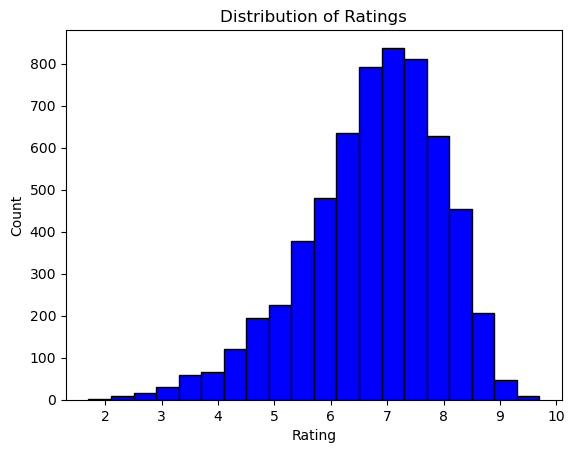

In [33]:
import matplotlib.pyplot as plt

plt.hist(dff['rating'], bins=20, color='blue', edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

### Vectorization:

In [36]:
vect = TfidfVectorizer(stop_words='english')
tfidf_matrix = vect.fit_transform(dff['genres'])

### Computing Cosine Similarity:

In [37]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

### Generating Movie Recommendations:

In [38]:
def recommend_movie(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = dff[dff['title'] == title].index[0]

    # Get a list of cosine similarities for that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar movies
    sim_scores = sim_scores[1:6]  # Get top 5 recommendations
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return df['title'].iloc[movie_indices]

### Predictions:

In [39]:
recommended_movies = recommend_movie('Friends')
print("Recommended Movies for 'Friends':")
print(recommended_movies)

Recommended Movies for 'Friends':
48     How I Met Your Mother
236             Unbelievable
241             Lo imposible
247                   Colony
349              Castle Rock
Name: title, dtype: object


In [42]:
recommended_movies = recommend_movie("Grey's Anatomy")
print("Recommended Movies for 'Grey's Anatomy':")
print(recommended_movies)

Recommended Movies for 'Grey's Anatomy':
37            365 dni
66         Bridgerton
103      Virgin River
149       Gossip Girl
151    Dawson's Creek
Name: title, dtype: object
